# POSTTEST 5

## WANDA NURHALIZA
## 2109106055

## IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns

## MEMBACA FILE CSV DAN MENAMPILKAN INFORMASI DARI DATASET

In [2]:
df = pd.read_csv("Star3642_balanced.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [3]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


##### KETERANGAN :
###### Vmag = Ukuran Bintang secara Visual
###### Plx = Jarak Antara Bintang dan Bumi
###### e-Plx = Kesalahan Standar Plx
###### B-V = Indeks Warna (Bintang panas memiliki indeks warna B-V mendekati 0 atau negatif, sedangkan bintang dingin memiliki indeks warna B-V mendekati 2,0)
###### SpType = Tipe Spektral
###### AmaG = Ukuran Bintang secara Mutlak
###### TargetClass = Yang Menentukan Ukuran Bintang (Kecil = 0 dan Besar = 1)
#####

In [4]:
df['TargetClass'].unique()

array([0, 1], dtype=int64)

## DATA SPLITTING

In [5]:
X = df[['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag']]
Y = df['TargetClass']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## ALGORITMA SUPERVISED LEARNING

### 1. K-NEAREST NEIGHBOUR (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
KNN = KNeighborsClassifier (n_neighbors = 5)

In [10]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
print(f'Akurasi Training Menggunakan KNN : {KNN.score(X_train, Y_train)}')
print(f'Akurasi Testing  Menggunakan KNN : {KNN.score(X_test, Y_test)}')

Akurasi Training Menggunakan KNN : 0.904565739787161
Akurasi Testing  Menggunakan KNN : 0.8710562414266118


In [12]:
star = [[7.64, 12.6, 1.04, 0.940, 20.2341051]]
KNN.predict(star)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### 2. DECISION TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
DT = DecisionTreeClassifier().fit(X_train, Y_train)

In [15]:
print(f'Akurasi Training Menggunakan Decision Tree : {DT.score(X_train, Y_train)}') 
print(f'Akurasi Testing  Menggunakan Decision Tree : {DT.score(X_test, Y_test)}') 

Akurasi Training Menggunakan Decision Tree : 1.0
Akurasi Testing  Menggunakan Decision Tree : 0.8326474622770919


In [16]:
star = [[7.64, 12.6, 1.04, 0.940, 20.2341051]]
DT.predict(star)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### 3. LINEAR REGRESSION

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [18]:
x = df[['Amag']] # PREDICTOR
y = df[['Vmag']] # TARGET

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
LR = LinearRegression().fit(x_train, y_train)

In [21]:
LR_predict = LR.predict(x_test)

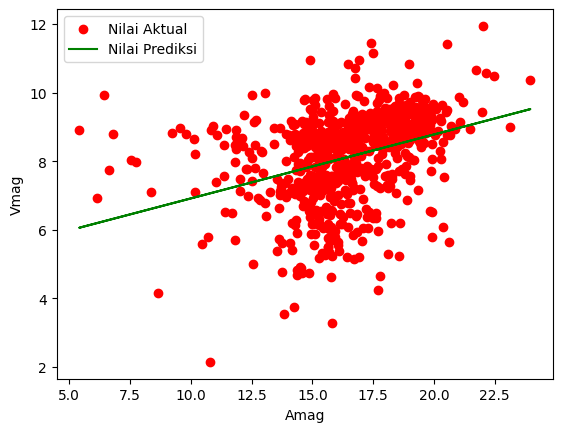

In [22]:
plt.scatter(x_test, y_test, color = "red", label = "Nilai Aktual")
plt.plot(x_test, LR_predict, color = "green", label = "Nilai Prediksi")
plt.xlabel("Amag")
plt.ylabel("Vmag")
plt.legend()
plt.show()

### 4. NAIVE BAYES

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [24]:
GNB = GaussianNB().fit(X_train, Y_train)

In [25]:
GNB_predict = GNB.predict(X_test)

In [26]:
print(f'Akurasi Training Menggunakan GNB : {GNB.score(X_train, Y_train)}') 
print(f'Akurasi Testing  Menggunakan GNB : {GNB.score(X_test, Y_test)}') 

Akurasi Training Menggunakan GNB : 0.8657741160315826
Akurasi Testing  Menggunakan GNB : 0.8573388203017832


### 5. SUPPORT VECTOR MACHINE (SVM)

In [27]:
from sklearn.svm import SVC

In [28]:
SVM = SVC().fit(X_train, Y_train)
SVM_predict = SVM.predict(X_test)

In [29]:
print(f'Akurasi Training Menggunakan SVM : {SVM.score(X_train, Y_train)}') 
print(f'Akurasi Testing  Menggunakan SVM : {SVM.score(X_test, Y_test)}') 

Akurasi Training Menggunakan SVM : 0.8853415722622726
Akurasi Testing  Menggunakan SVM : 0.8834019204389575


## PERBANDINGAN SCORE/HASIL DARI BEBERAPA ALGORITMA

In [30]:
print("\n")
print("=================================================================")
print("                       PERBANDINGAN SCORE                        ")
print("=================================================================")
print("\n")
print("---------------------- K-NEAREST NEIGHBOUR ----------------------")
print(f'Akurasi Training Menggunakan KNN : {KNN.score(X_train, Y_train)}')
print(f'Akurasi Testing  Menggunakan KNN : {KNN.score(X_test, Y_test)}')
print("\n")
print("------------------------- DESICION TREE -------------------------")
print(f'Akurasi Training Menggunakan Decision Tree : {DT.score(X_train, Y_train)}') 
print(f'Akurasi Testing  Menggunakan Decision Tree : {DT.score(X_test, Y_test)}') 
print("\n")
print("-------------------------- NAIVE BAYES --------------------------")
print(f'Akurasi Training Menggunakan GNB : {GNB.score(X_train, Y_train)}') 
print(f'Akurasi Testing  Menggunakan GNB : {GNB.score(X_test, Y_test)}') 
print("\n")
print("--------------------- SUPPORT VECTOR MACHINE --------------------")
print(f'Akurasi Training Menggunakan SVM : {SVM.score(X_train, Y_train)}') 
print(f'Akurasi Testing  Menggunakan SVM : {SVM.score(X_test, Y_test)}')
print("\n")



                       PERBANDINGAN SCORE                        


---------------------- K-NEAREST NEIGHBOUR ----------------------
Akurasi Training Menggunakan KNN : 0.904565739787161
Akurasi Testing  Menggunakan KNN : 0.8710562414266118


------------------------- DESICION TREE -------------------------
Akurasi Training Menggunakan Decision Tree : 1.0
Akurasi Testing  Menggunakan Decision Tree : 0.8326474622770919


-------------------------- NAIVE BAYES --------------------------
Akurasi Training Menggunakan GNB : 0.8657741160315826
Akurasi Testing  Menggunakan GNB : 0.8573388203017832


--------------------- SUPPORT VECTOR MACHINE --------------------
Akurasi Training Menggunakan SVM : 0.8853415722622726
Akurasi Testing  Menggunakan SVM : 0.8834019204389575




#### KESIMPULAN :
##### Berdasarkan perbandingan score/hasil dari beberapa algoritma, dapat disimpulkan bahwa algoritma yang paling efektif adalah Desicion Tree

## EVALUASI

### CONFUSION MATRIX

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### VISUALISASI CONFUSION MATRIX K-NEAREST NEIGHBOUR

In [32]:
CM_predict = KNN.predict(X_test)

In [33]:
CM = confusion_matrix(Y_test, CM_predict)
CM

array([[321,  49],
       [ 45, 314]], dtype=int64)

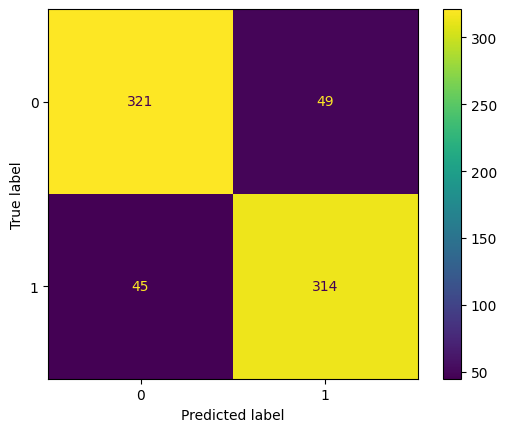

In [34]:
DCM = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = KNN.classes_)
DCM.plot()
plt.grid(False)
plt.show()

#### VISUALISASI CONFUSION MATRIX DECISION TREE

In [35]:
CM_predict2 = DT.predict(X_test)

In [36]:
CM2 = confusion_matrix(Y_test, CM_predict2)
CM2

array([[299,  71],
       [ 51, 308]], dtype=int64)

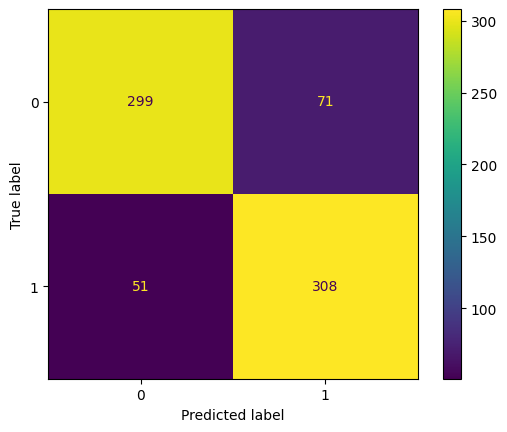

In [37]:
DCM2 = ConfusionMatrixDisplay(confusion_matrix = CM2, display_labels = DT.classes_)
DCM2.plot()
plt.grid(False)
plt.show()

#### VISUALISASI CONFUSION MATRIX NAIVE BAYES

In [38]:
CM_predict3 = GNB.predict(X_test)

In [39]:
CM3 = confusion_matrix(Y_test, CM_predict3)
CM3

array([[340,  30],
       [ 74, 285]], dtype=int64)

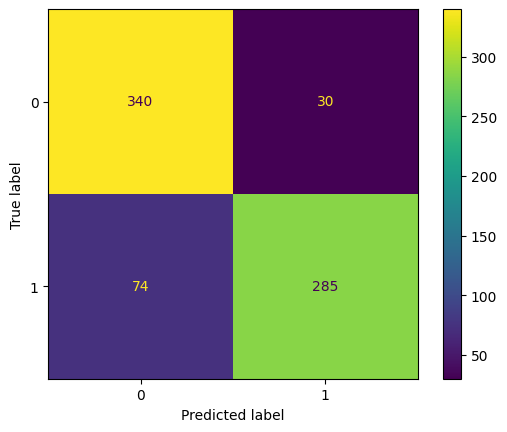

In [40]:
DCM3 = ConfusionMatrixDisplay(confusion_matrix = CM3, display_labels = GNB.classes_)
DCM3.plot()
plt.grid(False)
plt.show()

#### VISUALISASI CONFUSION MATRIX SUPPORT VECTOR MACHINE

In [41]:
CM_predict4 = SVM.predict(X_test)

In [42]:
CM4 = confusion_matrix(Y_test, CM_predict4)
CM4

array([[331,  39],
       [ 46, 313]], dtype=int64)

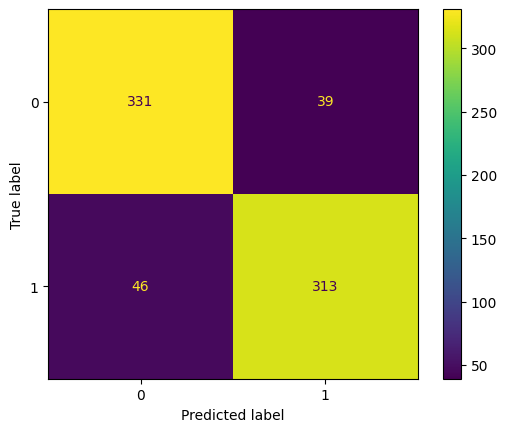

In [43]:
DCM4 = ConfusionMatrixDisplay(confusion_matrix = CM4, display_labels = SVM.classes_)
DCM4.plot()
plt.grid(False)
plt.show()

## TAMPILAN SCORE/HASIL DARI MODEL - MODEL UNTUK CLASSIFICATION

In [44]:
from sklearn.metrics import classification_report

In [45]:
print("\n")
print("=======================================================")
print("                 CLASSIFICATION REPORT                 ")
print("=======================================================")
print("\n")
print("----------------- K-NEAREST NEIGHBOUR -----------------")
print(classification_report (Y_test, CM_predict))
print("\n")
print("-------------------- DESICION TREE --------------------")
print(classification_report (Y_test, CM_predict2))
print("\n")
print("--------------------- NAIVE BAYES ---------------------")
print(classification_report (Y_test, CM_predict3))
print("\n")
print("---------------- SUPPORT VECTOR MACHINE ---------------")
print(classification_report (Y_test, CM_predict4))
print("\n")



                 CLASSIFICATION REPORT                 


----------------- K-NEAREST NEIGHBOUR -----------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       370
           1       0.87      0.87      0.87       359

    accuracy                           0.87       729
   macro avg       0.87      0.87      0.87       729
weighted avg       0.87      0.87      0.87       729



-------------------- DESICION TREE --------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       370
           1       0.81      0.86      0.83       359

    accuracy                           0.83       729
   macro avg       0.83      0.83      0.83       729
weighted avg       0.83      0.83      0.83       729



--------------------- NAIVE BAYES ---------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       370
     

## TAMPILAN VISUALISASI DARI MODEL - MODEL UNTUK REGRESSION

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
MSE = mean_squared_error(y_test, LR_predict)
RMSE = mean_squared_error(y_test, LR_predict, squared = False)
R2 = LR.score(x_test, y_test)
MAE = mean_absolute_error(y_test, LR_predict)

In [48]:
print("\n")
print("===================================")
print("         REGRESSION REPORT         ")
print("===================================")
print("\n")
print("Nilai MSE  : ", MSE)
print("Nilai RMSE : ", RMSE)
print("Nilai R2   : ", R2)
print("Nilai MAE  : ", MAE)
print("\n")



         REGRESSION REPORT         


Nilai MSE  :  1.523728841192048
Nilai RMSE :  1.2343941190689658
Nilai R2   :  0.10952495796673989
Nilai MAE  :  0.9609426199647733


